### Import Libraries

#### Links
1. Seaborn Plots  
https://seaborn.pydata.org/generated/seaborn.lineplot.html
    
2. Seaborn Examples  
https://seaborn.pydata.org/examples/index.html
    
3. Seaborn Tutorial  
https://seaborn.pydata.org/tutorial.html

In [1]:
# import sys
# !{sys.executable} -m pip install 

# pandas
# matplotlib
# seaborn

In [2]:
import os
# os.listdir()

In [3]:
import json
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

/tmp/ipykernel_2713379/986204484.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### Helper Function for Plotting

In [4]:
import math

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

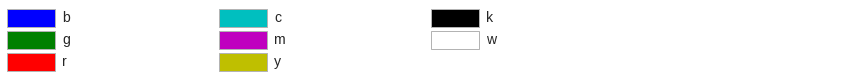

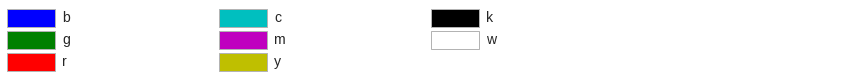

In [5]:
plot_colortable(mcolors.BASE_COLORS, ncols=3, sort_colors=False)

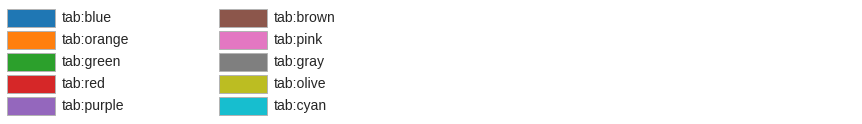

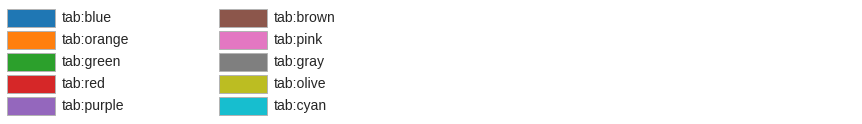

In [6]:
plot_colortable(mcolors.TABLEAU_COLORS, ncols=2, sort_colors=False)

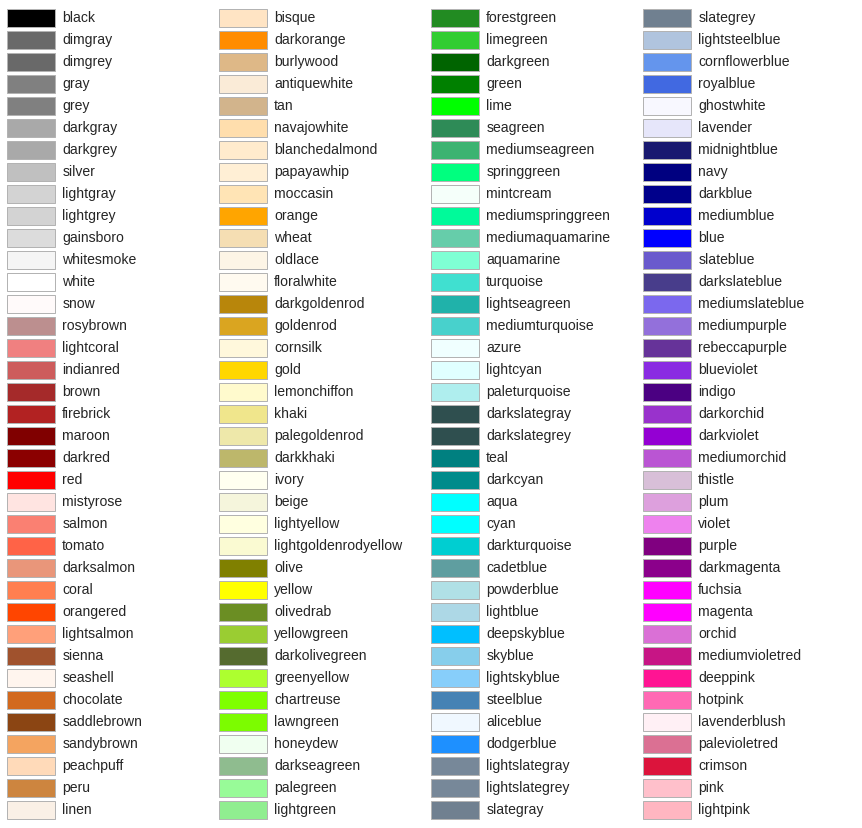

In [7]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

### Read CSV to Dataframe

In [8]:
df_original = pd.read_csv('Dataset.csv')
df_original

,ID,TEXT,LABELS,INCLUDED,TRANSLATED
0,0,"Patwaari aur youthiye larte rehein ge, meanwhi...","{'id': '0', 'text': 'Patwaari aur youthiye lar...",0,"Patwari and Uthiye will continue to write, mea..."
1,1,I hope women get over their bad boy syndrome s...,"{'id': '1', 'text': ""I hope women get over the...",0,I hope women get over their bad boy syndrome s...
2,2,Kohli se itna pyaar hai toh India shift ho jao...,"{'id': '2', 'text': 'Kohli se itna pyaar hai t...",0,"If you love Kohli so much, then shift to India..."
3,3,Saary desi landey ke liberals aur feminazis Im...,"{'id': '3', 'text': 'Saary desi landey ke libe...",0,All Desiland liberals and feminists are agains...
4,4,Why is Halloween celebration gaining popularit...,"{'id': '4', 'text': 'Why is Halloween celebrat...",0,Why is Halloween celebration gaining popularit...
...,...,...,...,...,...
1025,1025,Ben stock se hi kuch seekh lo. Balkay aap kya ...,"{'id': '1025', 'text': 'Ben stock se hi kuch s...",0,"Find something hi from Beanstock. Rather, what..."
1026,1026,Kaise pagalo ka desh hain jisne cricket match ...,"{'id': '1026', 'text': 'Kaise pagalo ka desh h...",0,Who is the country who won the cup of the cric...
1027,1027,"Tum log is mulk ko road py ly aaye ho, khud bh...","{'id': '1027', 'text': 'Tum log is mulk ko roa...",0,"You have drunk the road to the country, you ha..."
1028,1028,Nikalo is ghatiya aurat ko media sa bahir or A...,"{'id': '1028', 'text': 'Nikalo is ghatiya aura...",0,"Take out the ugly woman, media sa baheer or bo..."


In [9]:
df_original.dtypes

ID             int64
TEXT          object
LABELS        object
INCLUDED       int64
TRANSLATED    object
dtype: object

### Clean Dataframe and Make JSON dataset file

In [10]:
df = df_original[df_original['INCLUDED']==0]
# df.reset_index(drop=True,inplace=True)
# df = df.reset_index(level=0)
# df = df.drop(columns=['ID'])
# df = df.rename(columns={"index": "ID"}, errors="raise")
df

,ID,TEXT,LABELS,INCLUDED,TRANSLATED
0,0,"Patwaari aur youthiye larte rehein ge, meanwhi...","{'id': '0', 'text': 'Patwaari aur youthiye lar...",0,"Patwari and Uthiye will continue to write, mea..."
1,1,I hope women get over their bad boy syndrome s...,"{'id': '1', 'text': ""I hope women get over the...",0,I hope women get over their bad boy syndrome s...
2,2,Kohli se itna pyaar hai toh India shift ho jao...,"{'id': '2', 'text': 'Kohli se itna pyaar hai t...",0,"If you love Kohli so much, then shift to India..."
3,3,Saary desi landey ke liberals aur feminazis Im...,"{'id': '3', 'text': 'Saary desi landey ke libe...",0,All Desiland liberals and feminists are agains...
4,4,Why is Halloween celebration gaining popularit...,"{'id': '4', 'text': 'Why is Halloween celebrat...",0,Why is Halloween celebration gaining popularit...
...,...,...,...,...,...
1025,1025,Ben stock se hi kuch seekh lo. Balkay aap kya ...,"{'id': '1025', 'text': 'Ben stock se hi kuch s...",0,"Find something hi from Beanstock. Rather, what..."
1026,1026,Kaise pagalo ka desh hain jisne cricket match ...,"{'id': '1026', 'text': 'Kaise pagalo ka desh h...",0,Who is the country who won the cup of the cric...
1027,1027,"Tum log is mulk ko road py ly aaye ho, khud bh...","{'id': '1027', 'text': 'Tum log is mulk ko roa...",0,"You have drunk the road to the country, you ha..."
1028,1028,Nikalo is ghatiya aurat ko media sa bahir or A...,"{'id': '1028', 'text': 'Nikalo is ghatiya aura...",0,"Take out the ugly woman, media sa baheer or bo..."


In [11]:
print(df['LABELS'].isnull().sum())
print(df['LABELS'].isnull().values.any())

0
False


In [12]:
for i, f in df.iterrows():
    try:
        # f['LABELS'] = eval(f['LABELS'])
        labels_= eval(f['LABELS'])
        labels_ = labels_['labels']
        df.at[i, 'LABELS'] = dict(id=str(f['ID']), text=f['TEXT'], labels=labels_, translation=f['TRANSLATED'])
    except:
        df.at[i, 'LABELS'] = dict(id=str(f['ID']), text=f['TEXT'], labels=[], translation=f['TRANSLATED'])

In [13]:
df['LABELS'].isnull().sum()

0

In [14]:
df

,ID,TEXT,LABELS,INCLUDED,TRANSLATED
0,0,"Patwaari aur youthiye larte rehein ge, meanwhi...","{'id': '0', 'text': 'Patwaari aur youthiye lar...",0,"Patwari and Uthiye will continue to write, mea..."
1,1,I hope women get over their bad boy syndrome s...,"{'id': '1', 'text': 'I hope women get over the...",0,I hope women get over their bad boy syndrome s...
2,2,Kohli se itna pyaar hai toh India shift ho jao...,"{'id': '2', 'text': 'Kohli se itna pyaar hai t...",0,"If you love Kohli so much, then shift to India..."
3,3,Saary desi landey ke liberals aur feminazis Im...,"{'id': '3', 'text': 'Saary desi landey ke libe...",0,All Desiland liberals and feminists are agains...
4,4,Why is Halloween celebration gaining popularit...,"{'id': '4', 'text': 'Why is Halloween celebrat...",0,Why is Halloween celebration gaining popularit...
...,...,...,...,...,...
1025,1025,Ben stock se hi kuch seekh lo. Balkay aap kya ...,"{'id': '1025', 'text': 'Ben stock se hi kuch s...",0,"Find something hi from Beanstock. Rather, what..."
1026,1026,Kaise pagalo ka desh hain jisne cricket match ...,"{'id': '1026', 'text': 'Kaise pagalo ka desh h...",0,Who is the country who won the cup of the cric...
1027,1027,"Tum log is mulk ko road py ly aaye ho, khud bh...","{'id': '1027', 'text': 'Tum log is mulk ko roa...",0,"You have drunk the road to the country, you ha..."
1028,1028,Nikalo is ghatiya aurat ko media sa bahir or A...,"{'id': '1028', 'text': 'Nikalo is ghatiya aura...",0,"Take out the ugly woman, media sa baheer or bo..."


## Dataset Statistics
### 0.Basics

Total Number of Samples:   
Total Number of Spans:   
Average Sample Length:   
Maximum Sample Length:  
Minimum Sample Length:  
Median Sample Length:    
Average Span Length:   
Maximum Span Length:  
Minimum Span Length:   
Median Span Length:  
Samples with Labels:  
Samples w/o Labels:   
Average Number of Fallacies/Sample: 
Maximum Number of Fallacies/Sample:    
Minimum Number of Fallacies/Sample:  

### 1. Average Sentence Length

In [15]:
colour_chosen = 'dodgerblue'
# 'rosybrown'
# 'dodgerblue'
# 'green'

In [16]:
avg_sample_length_list = []
for label in df['LABELS']:
    text = label['text']
    avg_sample_length_list.append(len(text))
    if len(text) < 10:
        raise Exception('Length of example less than 10 characters')

In [17]:
pd.Series(avg_sample_length_list).describe()

count    1030.000000
mean      147.560194
std        53.799810
min        42.000000
25%       110.000000
50%       136.000000
75%       171.000000
max       400.000000
dtype: float64

In [18]:
avg_sample_length = sum(avg_sample_length_list)/len(avg_sample_length_list)
avg_sample_length

147.56019417475727

In [19]:
avg_sample_length_list = np.array(avg_sample_length_list)
avg_sample_length_list = np.sort(avg_sample_length_list)

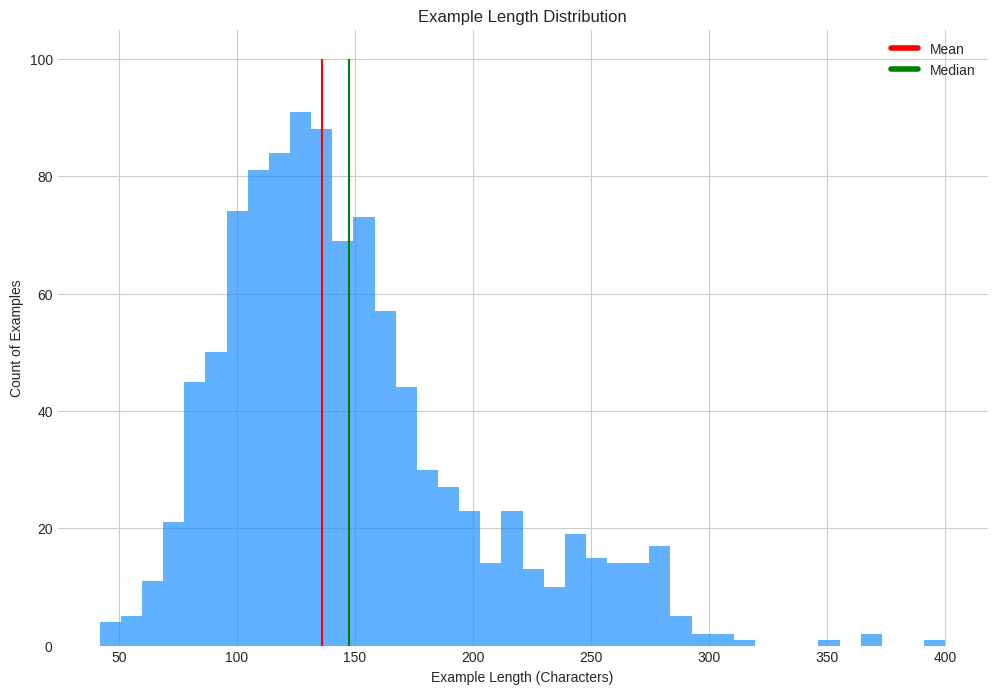

In [20]:
from matplotlib.lines import Line2D

plt.figure(figsize=(12, 8))
plt.xlabel('Example Length (Characters)')
plt.ylabel('Count of Examples')
plt.title('Example Length Distribution')
n, bins, patches = plt.hist(avg_sample_length_list, bins=40, 
#             density = True, 
            color =colour_chosen,
            alpha = 0.7)

plt.vlines(pd.Series(avg_sample_length_list).mean(),0, 100, color = 'green')
plt.vlines(pd.Series(avg_sample_length_list).median(),0, 100, color = 'red')

custom_lines = [Line2D([0], [0], color='red', lw=4), Line2D([0], [0], color='green', lw=4)]
plt.legend(custom_lines, ['Mean', 'Median'])

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

### 2. With or Without Labels

In [21]:
def normalize(lst):
    s = sum(lst)
    return map(lambda x: float(x)/s, lst)

In [22]:
with_or_without_labels = [0,0]
for label in df['LABELS']:
    if len(label['labels']) == 0:
        with_or_without_labels[1] += 1
    else:
        with_or_without_labels[0] += 1
        
normalized = list(normalize(with_or_without_labels))

with_or_without_labels, normalized

([923, 107], [0.8961165048543689, 0.10388349514563107])

<Figure size 640x480 with 0 Axes>

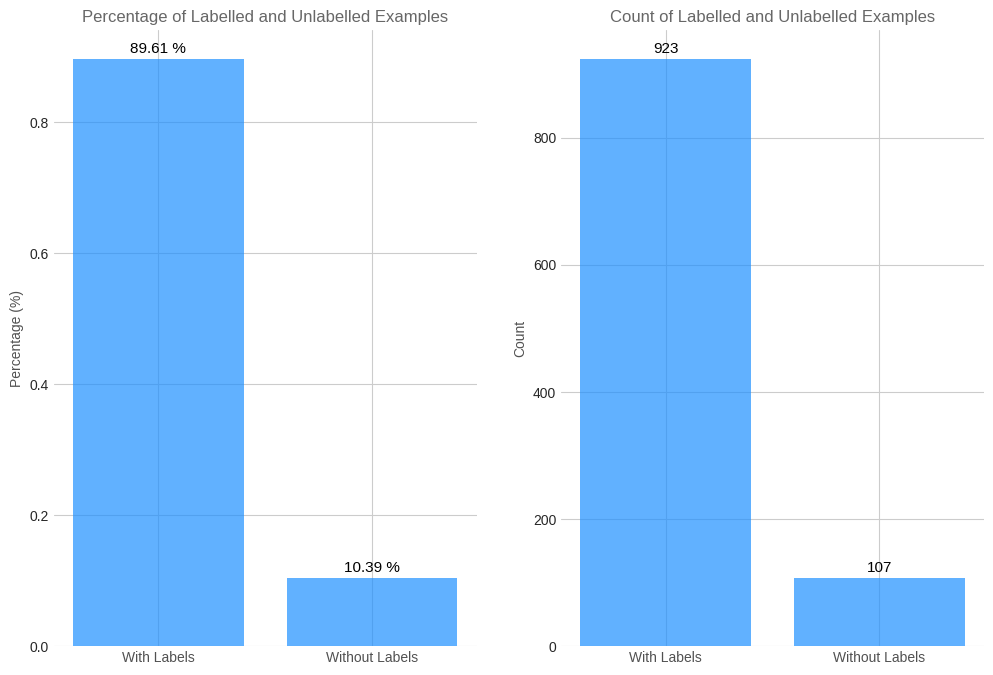

In [23]:
plt.figure()
plt.subplots(nrows=1, ncols=2, figsize=(12, 8))


ax1 = plt.subplot(1,2,1)
label_names =['With Labels','Without Labels']
pos = np.arange(len(label_names))
popularity = [56, 39, 34, 34, 29]

# change the bar colors to be less bright blue
bars = plt.bar(pos, normalized, align='center', linewidth=0, color=colour_chosen, alpha=0.7)


# soften all labels by turning grey
plt.xticks(pos, label_names, alpha=0.8)
plt.ylabel('Percentage (%)', alpha=0.8)
plt.title('Percentage of Labelled and Unlabelled Examples', alpha=0.7)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
for i, bar in enumerate(bars):
    plt.gca().text(bar.get_x() + bar.get_width()/2, 
                   bar.get_height() + 0.01, 
                   str(round(normalized[i]*100,2)) + ' %', 
                 ha='center', color='black', fontsize=11)
####################################### 2nd Plot
ax2 = plt.subplot(1,2,2)
label_names =['With Labels','Without Labels']
pos = np.arange(len(label_names))
popularity = [56, 39, 34, 34, 29]

# change the bar colors to be less bright blue
bars = plt.bar(pos, with_or_without_labels, align='center', linewidth=0, color=colour_chosen, alpha=0.7)


# soften all labels by turning grey
plt.xticks(pos, label_names, alpha=0.8)
plt.ylabel('Count', alpha=0.8)
plt.title('Count of Labelled and Unlabelled Examples', alpha=0.7)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
for i, bar in enumerate(bars):
    plt.gca().text(bar.get_x() + bar.get_width()/2, 
                   bar.get_height() + 10, 
                   str(with_or_without_labels[i]), 
                 ha='center', color='black', fontsize=11)

plt.show()

### Example Length Distribution (With and Without Labels)

In [24]:
with_labels_samples, without_labels_samples = [], []
for label in df['LABELS']:
    text = label['text']
    if len(label['labels']) == 0:
        without_labels_samples.append(len(text))
    else:         
        with_labels_samples.append(len(text))
        
        
len(with_labels_samples), len(without_labels_samples)

(923, 107)

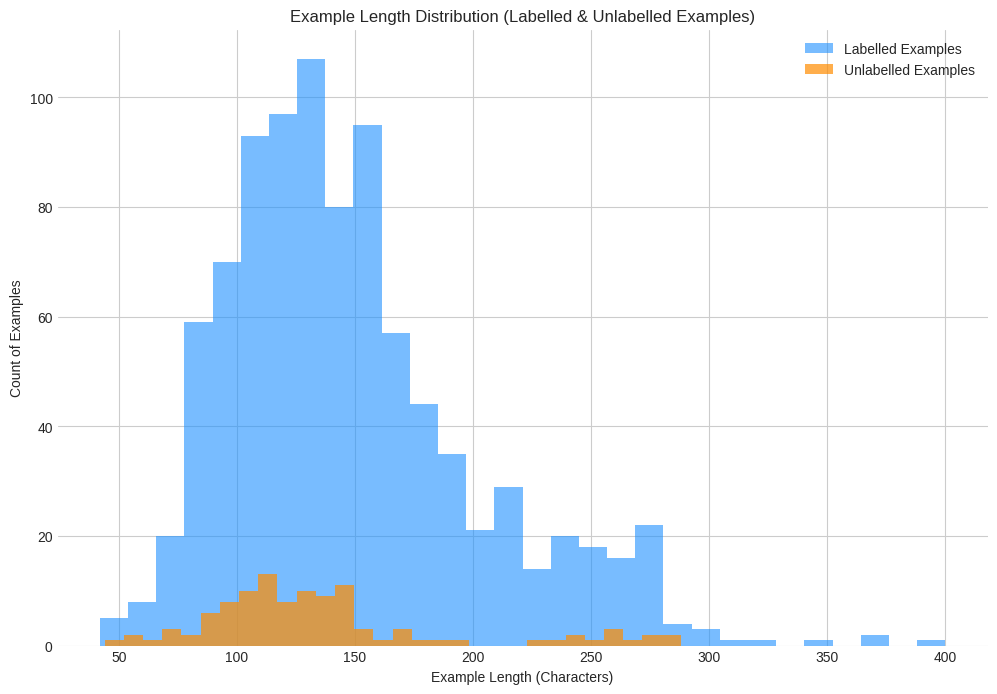

In [25]:
plt.figure(figsize=(12, 8))
plt.xlabel('Example Length (Characters)')
plt.ylabel('Count of Examples')
plt.title('Example Length Distribution (Labelled & Unlabelled Examples)')

plt.hist(with_labels_samples, alpha = 0.6, bins= 30, label='Labelled Examples',color =colour_chosen,)
plt.hist(without_labels_samples, alpha = 0.7, bins= 30, label='Unlabelled Examples', color='darkorange')
# color =colour_chosen,
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.legend()
plt.show()

### 3. Span Length Distribution

In [26]:
global_avg_span_length = []
class_avg_span_length = {}
for label in df['LABELS']:
    if len(label['labels']) != 0:
        for l in label['labels']:
            span = int(l['end_index']) - int(l['start_index'])
            global_avg_span_length.append(span)
            try:
                class_avg_span_length[l['technique']]['cumulative_span'] += span
                class_avg_span_length[l['technique']]['span_count'] += 1
            except:
                class_avg_span_length[l['technique']] = dict(cumulative_span = 0, span_count=0)
                class_avg_span_length[l['technique']]['cumulative_span'] += span
                class_avg_span_length[l['technique']]['span_count'] += 1

In [27]:
# Span Length Statistics
# Count is the total number of spans in the entire dataset
pd.Series(global_avg_span_length).describe()

count    2577.000000
mean       63.648040
std        67.814673
min         2.000000
25%        10.000000
50%        30.000000
75%       106.000000
max       400.000000
dtype: float64

In [28]:
# from matplotlib.lines import Line2D

# plt.figure(figsize=(12, 8))
# plt.ylabel('Count of Spans', alpha=0.8)
# plt.xlabel('Span Length', alpha=0.8)
# plt.title('Span Length Distribution', alpha=0.8)

# plt.vlines(pd.Series(global_avg_span_length).mean(),0, 1300, color = 'green')
# plt.vlines(pd.Series(global_avg_span_length).median(),0, 1300, color = 'red')

# custom_lines = [Line2D([0], [0], color='red', lw=4), Line2D([0], [0], color='green', lw=4)]
# plt.legend(custom_lines, ['Mean', 'Median'])

# enmax_palette = ["#808282", "#C2CD23", "#918BC3"]
# color_codes_wanted = ['grey', 'green', 'purple']

# for spine in plt.gca().spines.values():
#     spine.set_visible(False)

# c = lambda x: enmax_palette[color_codes_wanted.index(x)]

# sns.histplot(data=global_avg_span_length, kde=True, color=c("purple"), bins=15)

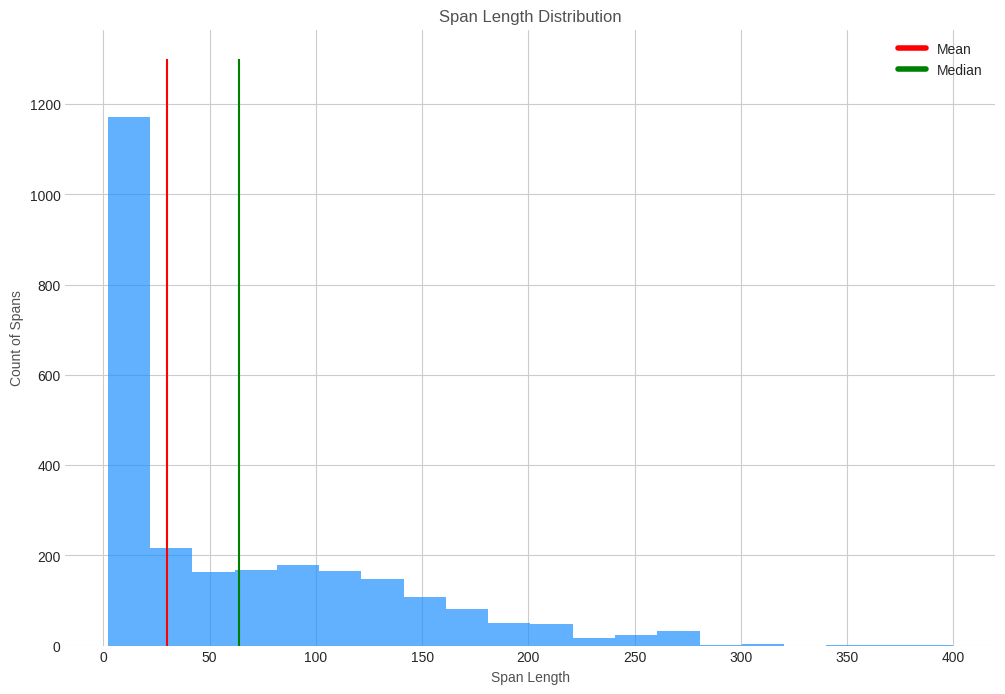

In [29]:
from matplotlib.lines import Line2D

plt.figure(figsize=(12, 8))
plt.ylabel('Count of Spans', alpha=0.8)
plt.xlabel('Span Length', alpha=0.8)
plt.title('Span Length Distribution', alpha=0.8)

plt.vlines(pd.Series(global_avg_span_length).mean(),0, 1300, color = 'green')
plt.vlines(pd.Series(global_avg_span_length).median(),0, 1300, color = 'red')

custom_lines = [Line2D([0], [0], color='red', lw=4), Line2D([0], [0], color='green', lw=4)]
plt.legend(custom_lines, ['Mean', 'Median'])

n, bins, patches = plt.hist(global_avg_span_length, bins=20, 
#             density = True, 
            color =colour_chosen,
            alpha = 0.7)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

### 4. Total Number of Spans for Each Class / Class Distribution

In [30]:
for key, item in class_avg_span_length.items():
    class_avg_span_length[key]['average'] = np.round(item['cumulative_span']/item['span_count'], 2)
class_avg_span_length

{'Name calling/Labeling': {'cumulative_span': 9349,
  'span_count': 563,
  'average': 16.61},
 'Loaded Language': {'cumulative_span': 6090,
  'span_count': 693,
  'average': 8.79},
 'Smears': {'cumulative_span': 55106, 'span_count': 382, 'average': 144.26},
 'Appeal to fear/prejudice': {'cumulative_span': 12540,
  'span_count': 87,
  'average': 144.14},
 'Causal Oversimplification': {'cumulative_span': 7823,
  'span_count': 86,
  'average': 90.97},
 'Presenting Irrelevant Data (Red Herring)': {'cumulative_span': 8687,
  'span_count': 61,
  'average': 142.41},
 'Thought-terminating cliché': {'cumulative_span': 1167,
  'span_count': 43,
  'average': 27.14},
 'Black-and-white Fallacy/Dictatorship': {'cumulative_span': 2597,
  'span_count': 34,
  'average': 76.38},
 'Flag-waving': {'cumulative_span': 3784, 'span_count': 27, 'average': 140.15},
 'Slogans': {'cumulative_span': 1103, 'span_count': 45, 'average': 24.51},
 'Exaggeration/Minimisation': {'cumulative_span': 31257,
  'span_count': 

In [31]:
list(class_avg_span_length.keys()) # Names of all PT in a list
total_number_of_spans_for_each_class = [val['span_count'] for val in list(class_avg_span_length.values())]
avarege_spans_for_each_class = [val['average'] for val in list(class_avg_span_length.values())]

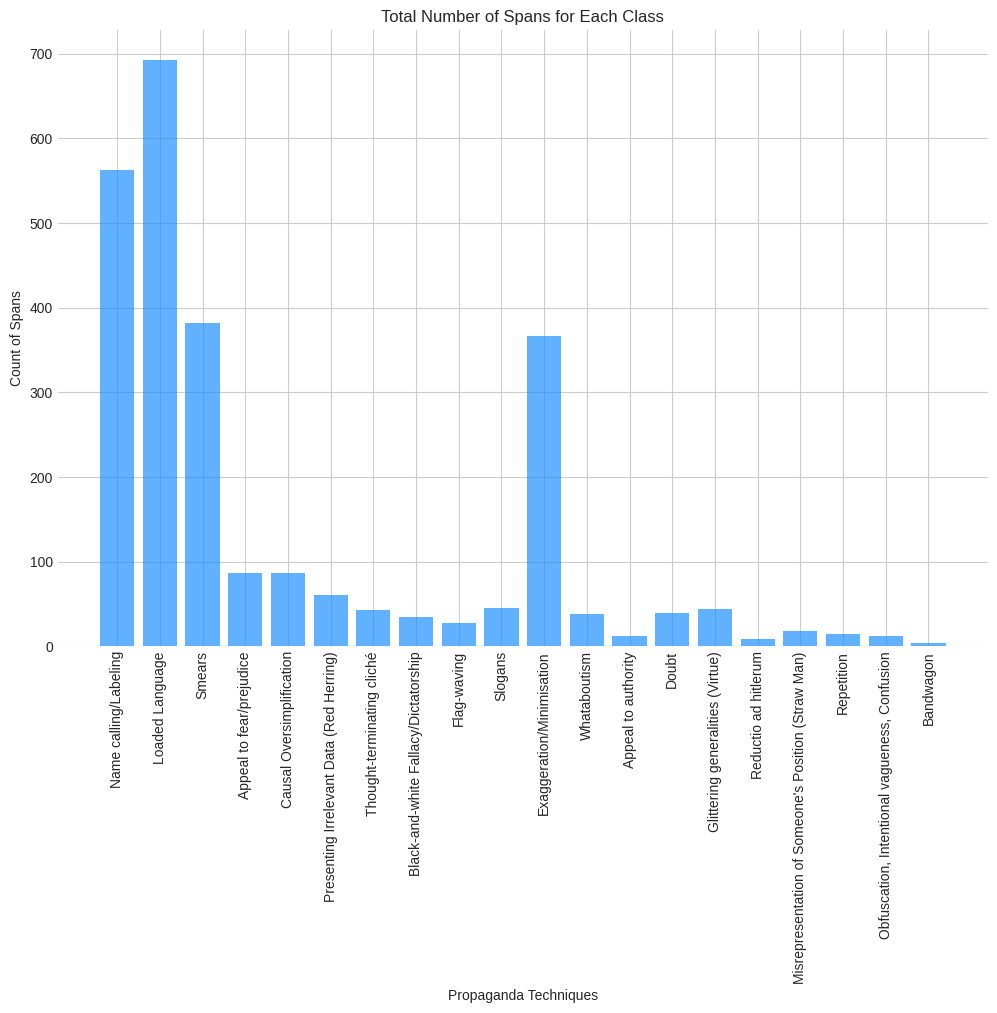

In [32]:
plt.figure(figsize = (12,8))

bars = plt.bar(range(len(class_avg_span_length)),total_number_of_spans_for_each_class, align = 'center', alpha = 0.7, color=colour_chosen)
plt.xticks(range(len(class_avg_span_length)),list(class_avg_span_length.keys()))
plt.ylabel('Count of Spans')
plt.xlabel('Propaganda Techniques')
plt.title('Total Number of Spans for Each Class')

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)

   
plt.show()

### 5. Average Span Length for Each Class

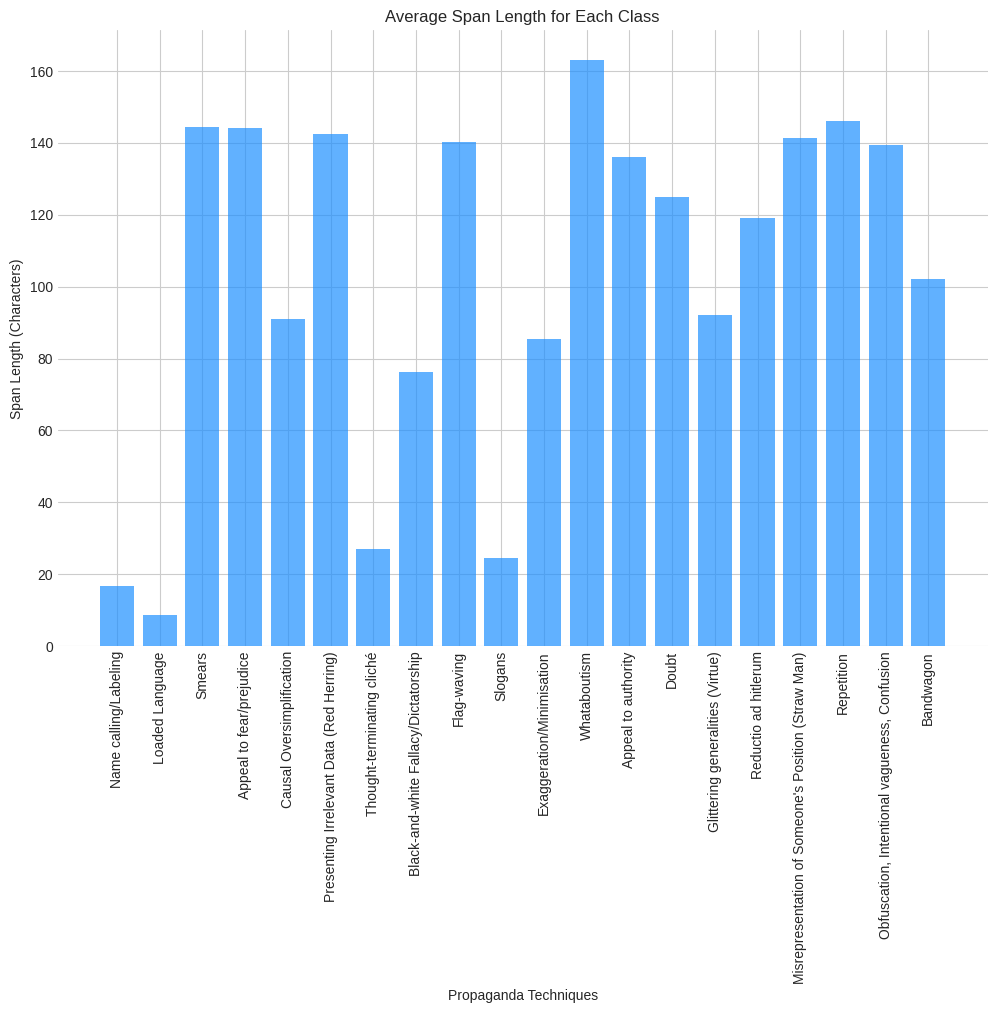

In [33]:
fig, ax = plt.subplots(figsize = (12,8))
plt.bar(list(class_avg_span_length.keys()), avarege_spans_for_each_class, align = 'center', alpha = 0.7, color=colour_chosen)

plt.xticks(range(len(class_avg_span_length)),list(class_avg_span_length.keys()))
plt.ylabel('Span Length (Characters)')
plt.xlabel('Propaganda Techniques')
plt.title('Average Span Length for Each Class')

# Remove the border of the figure
for spine in plt.gca().spines.values():
    spine.set_visible(False)

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)

# fig.autofmt_xdate() # So x tick labels are not overlapping
plt.show()

### 6. Average Number of Fallacies per Example

In [34]:
sample_count_per_avg_fallacy = {}
average_fallacy_per_sample_list = []
for label in df['LABELS']:
    average_fallacy_per_sample_list.append(len(label['labels']))
    try:
        sample_count_per_avg_fallacy[len(label['labels'])] += 1
    except:
        sample_count_per_avg_fallacy[len(label['labels'])] = 1

In [35]:
pd.Series(average_fallacy_per_sample_list).describe()

count    1030.000000
mean        2.501942
std         1.637598
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
dtype: float64

In [36]:
sample_count_per_avg_fallacy = dict(sorted(sample_count_per_avg_fallacy.items()))
avg_fallacy_numbers = list(sample_count_per_avg_fallacy.keys())
sample_counts = list(sample_count_per_avg_fallacy.values())

sample_count_per_avg_fallacy

{0: 107,
 1: 183,
 2: 263,
 3: 229,
 4: 136,
 5: 64,
 6: 30,
 7: 10,
 8: 6,
 9: 1,
 10: 1}

### 7.Distribution of Number of Fallacies across Examples

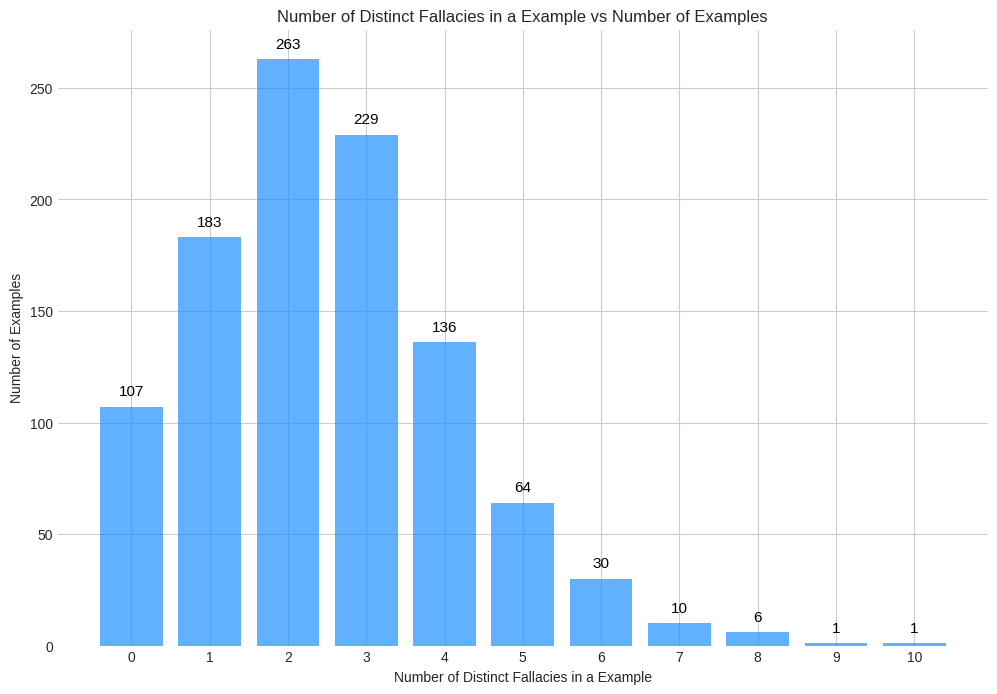

In [37]:
plt.figure(figsize = (12,8))

bars = plt.bar(range(len(sample_count_per_avg_fallacy)),sample_counts, align = 'center', alpha = 0.7, color=colour_chosen)
plt.xticks(range(len(sample_count_per_avg_fallacy)), avg_fallacy_numbers)
plt.ylabel('Number of Examples')
plt.xlabel('Number of Distinct Fallacies in a Example')
plt.title('Number of Distinct Fallacies in a Example vs Number of Examples')

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(0)
    
for i, bar in enumerate(bars):
    plt.gca().text(bar.get_x() + bar.get_width()/2, 
                   bar.get_height() + 5, 
                   str(sample_counts[i]), 
                 ha='center', color='black', fontsize=11)


plt.show()

### 8. Percentage Distribution of Classes (Pie Chart)

In [38]:
list(class_avg_span_length.keys())
# Manually ordered the list so the percentages don;t overlap
labels = [
 'Name calling/Labeling',
 'Repetition',
 'Doubt',
 'Reductio ad hitlerum',
 'Appeal to fear/prejudice',
 "Misrepresentation of Someone's Position (Straw Man)",
 'Loaded Language',
 'Bandwagon',
 'Smears',
 'Obfuscation, Intentional vagueness, Confusion',
 'Glittering generalities (Virtue)',
 'Causal Oversimplification',
 'Appeal to authority',
 'Presenting Irrelevant Data (Red Herring)',
 'Thought-terminating cliché',
 'Black-and-white Fallacy/Dictatorship',
 'Slogans',
 'Whataboutism',
 'Exaggeration/Minimisation',
 'Flag-waving']

In [39]:
# cmap = plt.get_cmap('Blues')
# colors = list(cmap(np.linspace(0.35, 2.05, len(x))))
colors =[
 'rosybrown',
 'navajowhite',
 'darkgreen',
 'deepskyblue',
 'saddlebrown',
 'deeppink',
 'teal',
 'lime',
 'mediumslateblue',
 'gold',
 'darkorange',
 'lightpink',
 'coral', 
 'grey',
 'violet',
 'royalblue',
 'aquamarine',
 'red',
 'olive',
 'black',
]

In [40]:
class_span_count = {}
for key, val in list(class_avg_span_length.items()):
    class_span_count[key] = val['span_count']
class_span_count

{'Name calling/Labeling': 563,
 'Loaded Language': 693,
 'Smears': 382,
 'Appeal to fear/prejudice': 87,
 'Causal Oversimplification': 86,
 'Presenting Irrelevant Data (Red Herring)': 61,
 'Thought-terminating cliché': 43,
 'Black-and-white Fallacy/Dictatorship': 34,
 'Flag-waving': 27,
 'Slogans': 45,
 'Exaggeration/Minimisation': 366,
 'Whataboutism': 38,
 'Appeal to authority': 12,
 'Doubt': 39,
 'Glittering generalities (Virtue)': 44,
 'Reductio ad hitlerum': 8,
 "Misrepresentation of Someone's Position (Straw Man)": 18,
 'Repetition': 15,
 'Obfuscation, Intentional vagueness, Confusion': 12,
 'Bandwagon': 4}

In [41]:
total_number_of_spans_for_each_class = [class_span_count[l] for l in labels]

<Figure size 640x480 with 0 Axes>

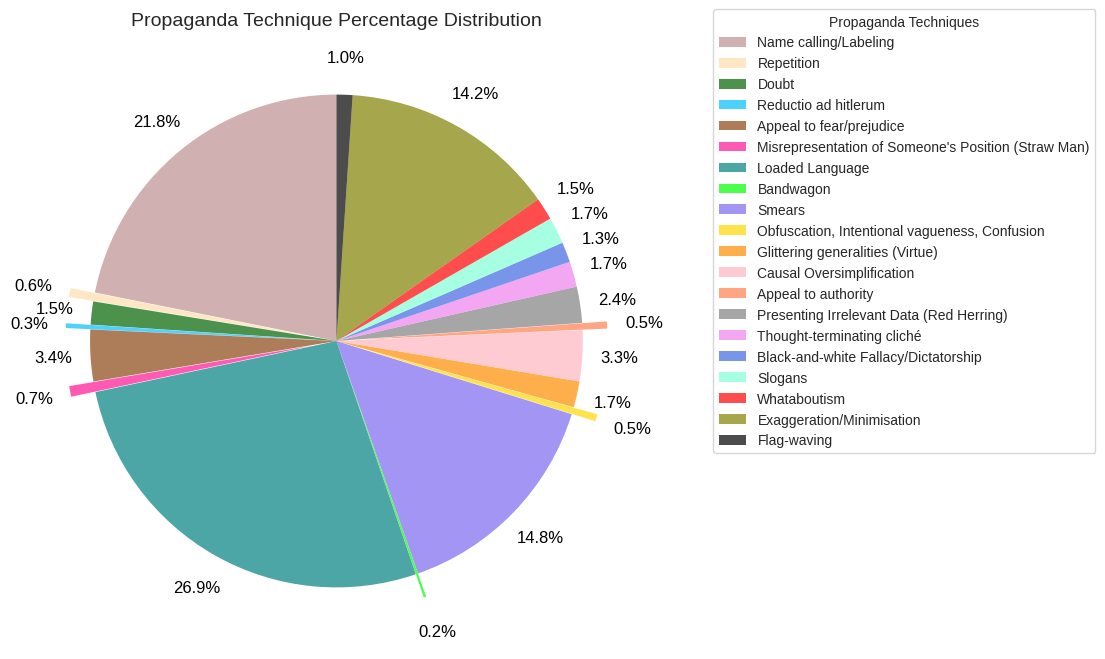

In [42]:
# https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/
plt.figure()
fig, ax = plt.subplots(figsize = (12,8))
patches, texts, pcts = ax.pie(
    total_number_of_spans_for_each_class, 
#     labels=labels, 
    autopct='%.1f%%',
#     wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    wedgeprops={"alpha": 0.7},
    colors=colors,
    textprops={'size': 'large'},
    startangle=90,
    pctdistance=1.15,
    explode=(0., 0.1, 0., 0.1, 0., 0.1, 0., 0.1, 0., 0.1, 0., 0., 0.1, 0., 0., 0., 0., 0., 0., 0.),
#     np.zeros(len(total_number_of_spans_for_each_class))
#     shadow = True
    )

# Get colour of the labels the same as the colour of the patch
# for i, patch in enumerate(patches):
#     if texts[i].get_text() == 'Smears':
#         patch.set_facecolor('dodgerblue')
#     texts[i].set_color(patch.get_facecolor())
    
plt.setp(pcts, color='black')
# plt.setp(texts, fontweight=600)


ax.set_title('Propaganda Technique Percentage Distribution', fontsize=14)
plt.legend(patches, labels, title = "Propaganda Techniques", bbox_to_anchor=(1.1, 1.05), frameon=True) #loc="best",
# plt.tight_layout()
plt.show()

### 8. Average Span Length Distribution per Class (Box and Whisker Plot)

In [43]:
average_span_per_class = {}
for label in df['LABELS']:
    if len(label['labels']) != 0:
        for l in label['labels']:
            span = int(l['end_index']) - int(l['start_index'])
            try:
                average_span_per_class[l['technique']].append(span)
            except:
                average_span_per_class[l['technique']] = []
                average_span_per_class[l['technique']].append(span)

In [44]:
import numpy as np
mean_list = []
for k, v in average_span_per_class.items():
    print(k)
    print('-'*15)
    mean = np.mean(np.array(average_span_per_class[k]))
    std = np.std(np.array(average_span_per_class[k]))
    count = len(average_span_per_class[k])
    print(mean, std, count)

Name calling/Labeling
---------------
16.605683836589698 10.233895359559511 563
Loaded Language
---------------
8.787878787878787 8.228677739922798 693
Smears
---------------
144.2565445026178 60.03957810348835 382
Appeal to fear/prejudice
---------------
144.13793103448276 50.209943699371884 87
Causal Oversimplification
---------------
90.96511627906976 42.44324464133431 86
Presenting Irrelevant Data (Red Herring)
---------------
142.40983606557376 51.66740325378777 61
Thought-terminating cliché
---------------
27.13953488372093 23.03039588603261 43
Black-and-white Fallacy/Dictatorship
---------------
76.38235294117646 38.957755933893885 34
Flag-waving
---------------
140.14814814814815 41.14806480639625 27
Slogans
---------------
24.511111111111113 12.115412080343912 45
Exaggeration/Minimisation
---------------
85.40163934426229 45.235689975789846 366
Whataboutism
---------------
163.1578947368421 56.548780207324434 38
Appeal to authority
---------------
136.08333333333334 63.7095732

<Figure size 640x480 with 0 Axes>

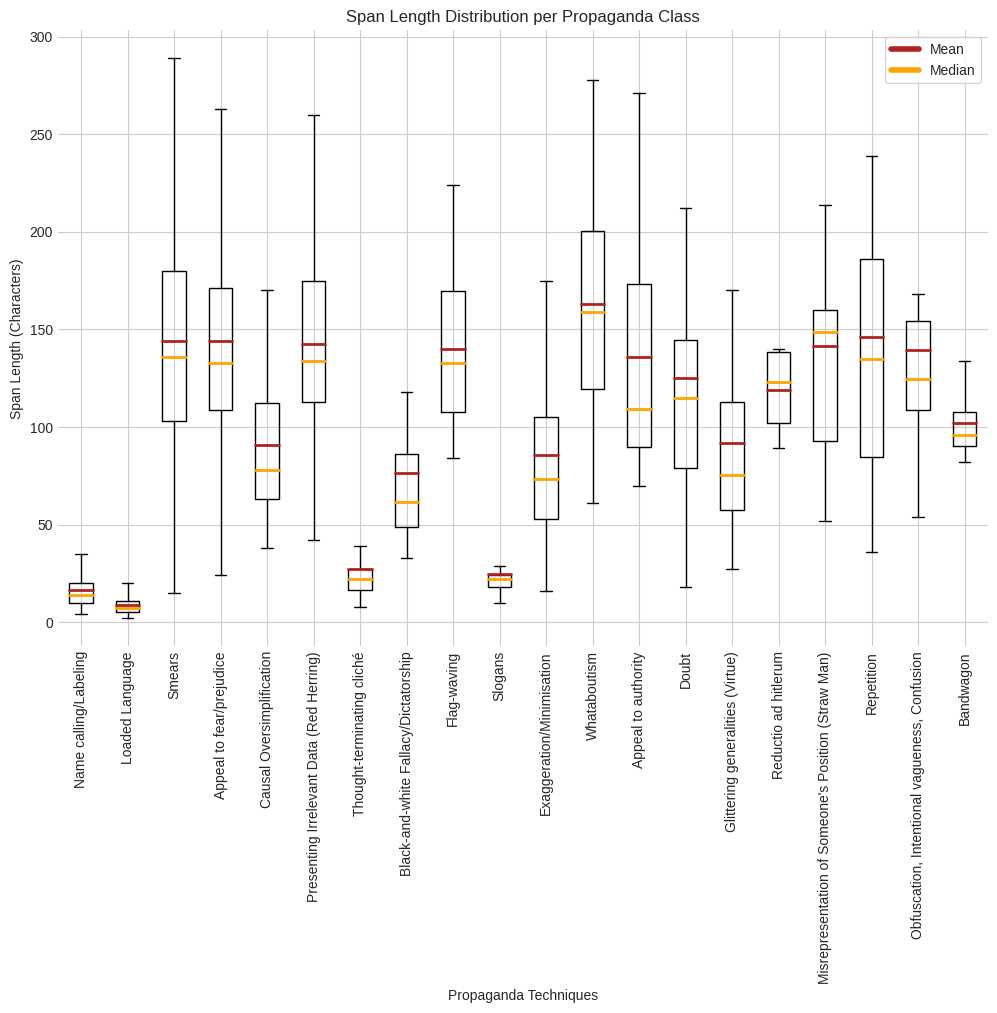

In [45]:
# https://matplotlib.org/stable/gallery/statistics/boxplot.html
plt.figure()
fig, ax = plt.subplots(figsize = (12,8))
# SHowfliers shows the outlier circles
medianprops = dict(linestyle='-', linewidth=2, color='orange')
meanlineprops = dict(linestyle='-', linewidth=2, color='firebrick')
ax.boxplot(average_span_per_class.values(), showfliers=False, meanline=True, meanprops=meanlineprops, showmeans=True, medianprops=medianprops)

ax.set_xticklabels(average_span_per_class.keys())
plt.ylabel('Span Length (Characters)')
plt.xlabel('Propaganda Techniques')
plt.title('Span Length Distribution per Propaganda Class')

for spine in plt.gca().spines.values():
    spine.set_visible(False)

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)
    
custom_lines = [Line2D([0], [0], color='firebrick', lw=4), Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, ['Mean', 'Median'], frameon=True, loc="best")
    
plt.show()

### 9. Co-occurence Matrix of Techniques

In [46]:
cooccurence_matrix = {}
fallacies = list(class_avg_span_length.keys())
d = pd.DataFrame(0, index=fallacies, columns=fallacies)
d

,Name calling/Labeling,Loaded Language,Smears,Appeal to fear/prejudice,Causal Oversimplification,Presenting Irrelevant Data (Red Herring),Thought-terminating cliché,Black-and-white Fallacy/Dictatorship,Flag-waving,Slogans,Exaggeration/Minimisation,Whataboutism,Appeal to authority,Doubt,Glittering generalities (Virtue),Reductio ad hitlerum,Misrepresentation of Someone's Position (Straw Man),Repetition,"Obfuscation, Intentional vagueness, Confusion",Bandwagon
Name calling/Labeling,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Loaded Language,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Smears,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Appeal to fear/prejudice,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Causal Oversimplification,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Presenting Irrelevant Data (Red Herring),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Thought-terminating cliché,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Black-and-white Fallacy/Dictatorship,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Flag-waving,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Slogans,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
for label in df['LABELS']:
    if len(label['labels']) != 0:
        fallacy_set = set()
        for l in label['labels']:
            fallacy_set.add(l['technique'])
        for f in fallacy_set:
            fallacy_list = list(fallacy_set)[:]
            fallacy_list.remove(f)
            for j in fallacy_list:
                if f == j:
                    print('Something is wrong?')
                d[f][j] += 1

In [48]:
d

,Name calling/Labeling,Loaded Language,Smears,Appeal to fear/prejudice,Causal Oversimplification,Presenting Irrelevant Data (Red Herring),Thought-terminating cliché,Black-and-white Fallacy/Dictatorship,Flag-waving,Slogans,Exaggeration/Minimisation,Whataboutism,Appeal to authority,Doubt,Glittering generalities (Virtue),Reductio ad hitlerum,Misrepresentation of Someone's Position (Straw Man),Repetition,"Obfuscation, Intentional vagueness, Confusion",Bandwagon
Name calling/Labeling,0,200,195,23,26,16,12,12,7,17,126,11,3,10,14,3,10,6,7,0
Loaded Language,200,0,167,52,43,26,21,14,12,24,131,21,4,12,13,5,6,5,4,2
Smears,195,167,0,32,29,25,9,5,9,13,162,17,1,19,11,5,11,9,4,1
Appeal to fear/prejudice,23,52,32,0,9,2,3,1,16,3,23,2,1,0,0,4,0,0,1,0
Causal Oversimplification,26,43,29,9,0,3,3,0,3,2,30,0,3,0,0,0,0,1,1,0
Presenting Irrelevant Data (Red Herring),16,26,25,2,3,0,1,2,1,3,24,1,0,3,0,1,1,0,0,0
Thought-terminating cliché,12,21,9,3,3,1,0,4,0,0,8,1,1,0,0,0,0,0,0,0
Black-and-white Fallacy/Dictatorship,12,14,5,1,0,2,4,0,0,2,8,0,0,1,2,0,1,0,1,0
Flag-waving,7,12,9,16,3,1,0,0,0,3,11,0,1,0,0,0,0,0,0,0
Slogans,17,24,13,3,2,3,0,2,3,0,8,3,0,0,1,0,1,0,0,0


In [49]:
matrix = d.values+0.0
np.fill_diagonal(matrix, -1, wrap=False)
matrix = matrix.astype(int)
matrix

array([[ -1, 200, 195,  23,  26,  16,  12,  12,   7,  17, 126,  11,   3,
         10,  14,   3,  10,   6,   7,   0],
       [200,  -1, 167,  52,  43,  26,  21,  14,  12,  24, 131,  21,   4,
         12,  13,   5,   6,   5,   4,   2],
       [195, 167,  -1,  32,  29,  25,   9,   5,   9,  13, 162,  17,   1,
         19,  11,   5,  11,   9,   4,   1],
       [ 23,  52,  32,  -1,   9,   2,   3,   1,  16,   3,  23,   2,   1,
          0,   0,   4,   0,   0,   1,   0],
       [ 26,  43,  29,   9,  -1,   3,   3,   0,   3,   2,  30,   0,   3,
          0,   0,   0,   0,   1,   1,   0],
       [ 16,  26,  25,   2,   3,  -1,   1,   2,   1,   3,  24,   1,   0,
          3,   0,   1,   1,   0,   0,   0],
       [ 12,  21,   9,   3,   3,   1,  -1,   4,   0,   0,   8,   1,   1,
          0,   0,   0,   0,   0,   0,   0],
       [ 12,  14,   5,   1,   0,   2,   4,  -1,   0,   2,   8,   0,   0,
          1,   2,   0,   1,   0,   1,   0],
       [  7,  12,   9,  16,   3,   1,   0,   0,  -1,   3,  11,  

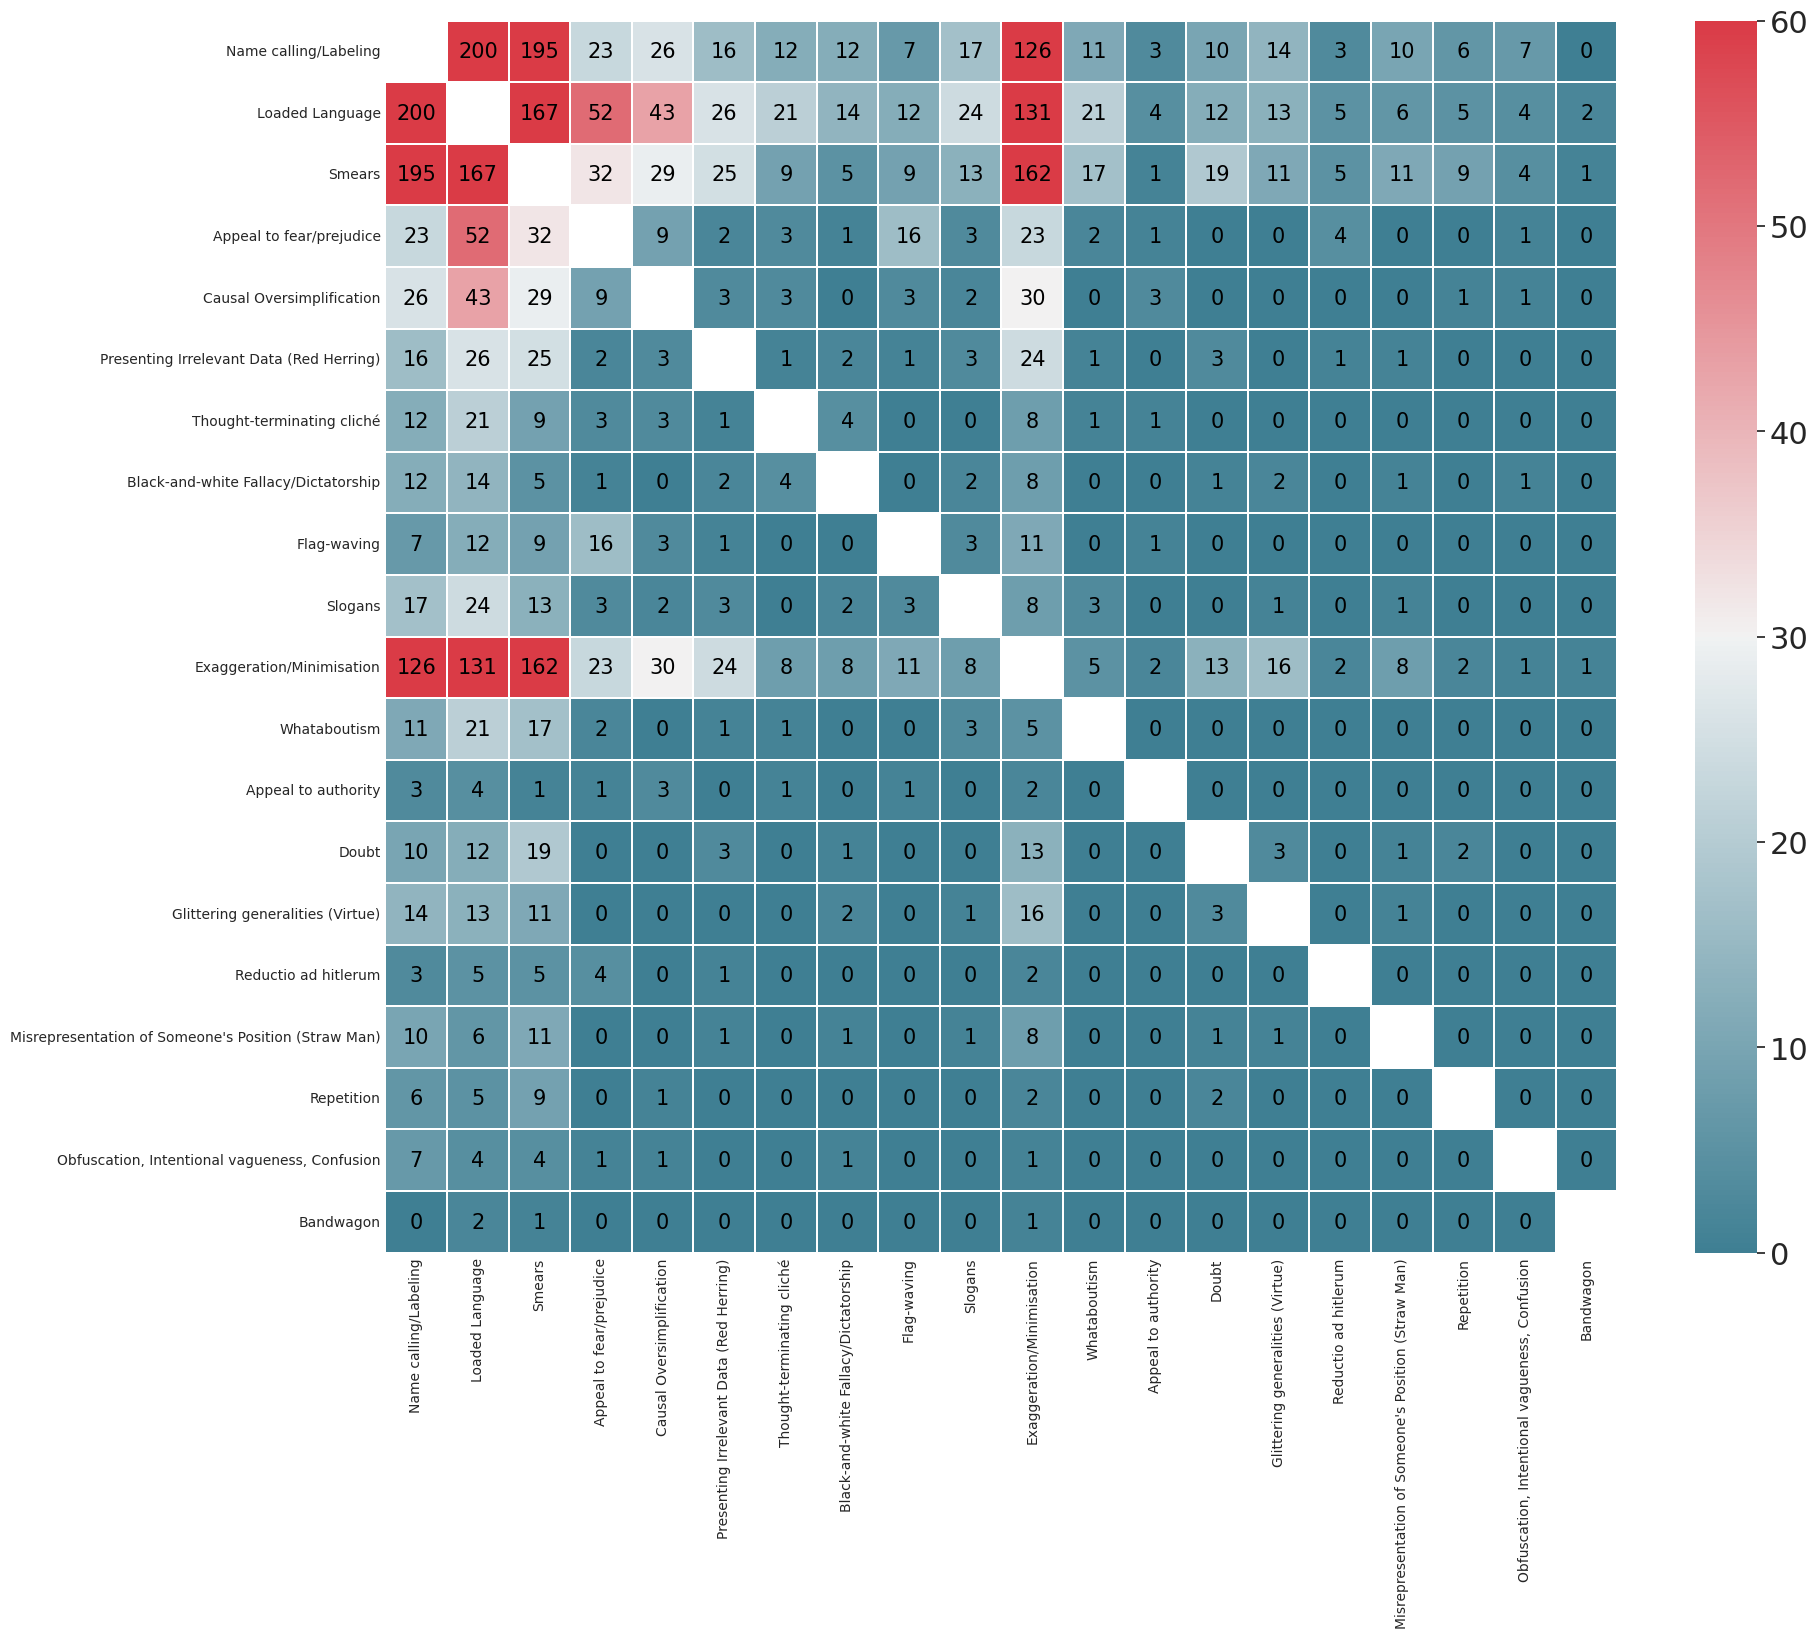

In [50]:
fig, ax = plt.subplots(figsize=(20, 16))
sns.set(font_scale=2)
ax = sns.heatmap(
    matrix, 
    annot=True,
#     cmap= 'viridis',
    mask=(matrix<0),
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    square=True,
    linewidths=1.25,
    xticklabels=fallacies,
    yticklabels=fallacies,
    cbar=True,
    fmt='',
    annot_kws={'size': 15, 'color': 'black'},
    vmin=0,
    vmax=60)

### 10. No. of Words and Vocabulary Size

In [51]:
import re
import string

In [52]:
def clean_text(text):
    """
    Clean the text of data
    """
    punctuation_list  = string.punctuation  # !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
    acceptable_list = "" #"?\"\'().,!%"
    remove_list = list(filter(lambda punctuation_list: punctuation_list[0] not in acceptable_list, punctuation_list))
    remove_list.append('•')
    remove_list.append('‘')

    text = text.replace('\n', ' ')
    has_any_remove = any([char in remove_list for char in text])
    if has_any_remove:
        for r in remove_list:
            if r in text:
                text = text.replace(r, ' ')
    has_any_accept = any([char in acceptable_list for char in text])
    if has_any_accept:
        for a in acceptable_list:
            if a in text and a not in "\"\'":
                text = re.sub(re.escape(a) + r"{2,}", a,text)
                text = text.replace(a, a+' ')
    text = re.sub(r' {2,}', ' ',text)
    text = text.strip()
    return text

In [54]:
all_words = []
for text in df['TEXT'].tolist():
    cleaned_text = clean_text(text)
    all_words += cleaned_text.split()

In [55]:
len(all_words)

28452

In [56]:
len(set(all_words))

7154